In [9]:
import pandas as pd
import sqlite3

In [11]:
conn=sqlite3.connect("sales_data.db")
query="select* from sales"
df=pd.read_sql_query(query,conn)
print(df)

   id   product  quantity    price
0   1   samsung        10  20000.0
1   2     apple         9  40000.0
2   3      vivo        14  25000.0
3   4     nokia        19  26000.0
4   5    realme         5  10000.0
5   6      vivo         7  22000.0
6   7   nothing         6  24000.0
7   8     redmi        10  27000.0
8   9      oppo        12  29000.0
9  10  one plus        13  23000.0


In [19]:
query="""SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS
 revenue FROM sales GROUP BY product"""
df=pd.read_sql_query(query,conn)
print(df)

    product  total_qty   revenue
0     apple          9  360000.0
1     nokia         19  494000.0
2   nothing          6  144000.0
3  one plus         13  299000.0
4      oppo         12  348000.0
5    realme          5   50000.0
6     redmi         10  270000.0
7   samsung         10  200000.0
8      vivo         21  504000.0


In [21]:
query=""" select product,sum(quantity * price ) as revenue from sales 
group by product"""
df=pd.read_sql_query(query,conn)
print(df)

    product   revenue
0     apple  360000.0
1     nokia  494000.0
2   nothing  144000.0
3  one plus  299000.0
4      oppo  348000.0
5    realme   50000.0
6     redmi  270000.0
7   samsung  200000.0
8      vivo  504000.0


In [31]:
query=""" select product,sum(quantity) as total_qty,sum(quantity*price) as revenue from sales
group by product
order by revenue desc
limit 5"""
df_top5=pd.read_sql_query(query,conn)
print(df_top5)

    product  total_qty   revenue
0      vivo         21  504000.0
1     nokia         19  494000.0
2     apple          9  360000.0
3      oppo         12  348000.0
4  one plus         13  299000.0


In [33]:
import matplotlib.pyplot as plt

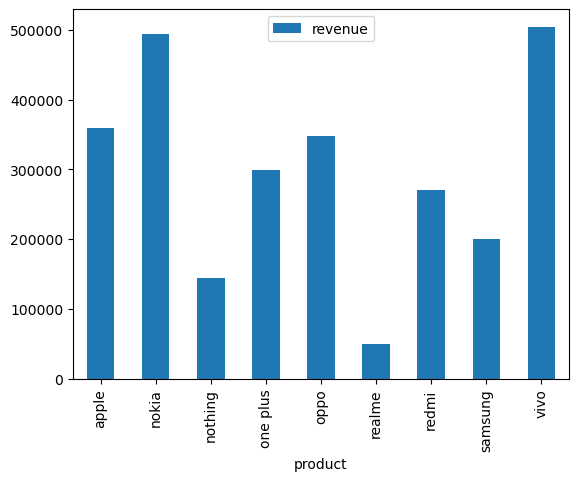

In [35]:
 df.plot(kind='bar', x='product', y='revenue')
 plt.savefig("sales_chart.png")

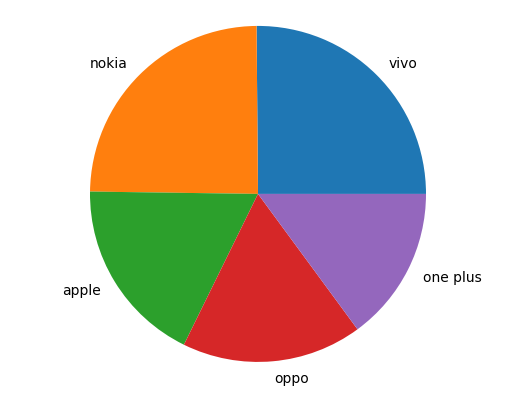

In [45]:
plt.pie(df_top5['revenue'],labels=df_top5['product'])
plt.axis('equal')
plt.savefig("revenue by product.png")
plt.show()